In [ ]:
import { config } from "dotenv";
import { ChatBedrockConverse } from "@langchain/aws";
import { TavilySearchResults } from "@langchain/community/tools/tavily_search";
import { MemorySaver } from "@langchain/langgraph";
import { HumanMessage } from "@langchain/core/messages";
import { createReactAgent } from "@langchain/langgraph/prebuilt";
import { tool } from "@langchain/core/tools";


In [2]:
const env = config();

[dotenv@17.2.1] injecting env (3) from .env -- tip: 🔐 prevent committing .env to code: https://dotenvx.com/precommit


In [16]:
const timeTool = tool(async () => new Date().toISOString(), {
  name: "getCurentTime",
  description: "Returns the current date/time in ISO format",
});


In [17]:
// Define the tools for the agent to use
const agentTools = [new TavilySearchResults({ maxResults: 3 }), timeTool];
const agentModel = new ChatBedrockConverse({
  model: "us.amazon.nova-micro-v1:0",
  region: Deno.env.BEDROCK_AWS_REGION ?? "us-east-1",
  credentials: {
    secretAccessKey: Deno.env.BEDROCK_AWS_SECRET_ACCESS_KEY ?? "",
    accessKeyId: Deno.env.BEDROCK_AWS_ACCESS_KEY_ID ?? "",
  },
  temperature: 0,
});


In [18]:
// Initialize memory to persist state between graph runs
const agentCheckpointer = new MemorySaver();
const agent = createReactAgent({
  llm: agentModel,
  tools: agentTools,
  checkpointSaver: agentCheckpointer,
})

In [19]:
// Now it's time to use!
const agentFinalState = await agent.invoke(
  { messages: [new HumanMessage("what is the current weather in sf")] },
  { configurable: { thread_id: "42" } }
);


In [20]:
console.log(
  agentFinalState.messages[agentFinalState.messages.length - 1].content
);

Here is the current weather information for San Francisco based on the search results:

- **Temperature**: 15.6°C (60.1°F)
- **Weather Condition**: Overcast
- **Wind**: 13.2 mph (21.2 kph) from the West
- **Pressure**: 1016 mb (30.0 inHg)
- **Humidity**: 83%
- **Feels Like**: 15.6°C (60.1°F)

The data was extracted from a result that indicates these conditions as of July 25, 2025 at 20:54 local time.

For the most accurate and current weather information, it is always best to check a reliable weather service directly.


In [21]:
const agentNextState = await agent.invoke(
  { messages: [new HumanMessage("what about ny")] },
  { configurable: { thread_id: "42" } }
);


In [22]:
console.log(
  agentNextState.messages[agentNextState.messages.length - 1].content
);


Here is the current weather information for New York City based on the search results:

- **Temperature**: 28.3°C (82.9°F)
- **Weather Condition**: Clear
- **Wind**: 5.6 mph (9.0 kph) from the North-Northwest
- **Pressure**: 1016 mb (29.99 inHg)
- **Humidity**: 68%
- **Feels Like**: 35.6°C (96.1°F)

This data was extracted from a result that indicates these conditions as of July 26, 2025 at 00:03 local time.

For the most accurate and current weather information, it is always best to check a reliable weather service directly.


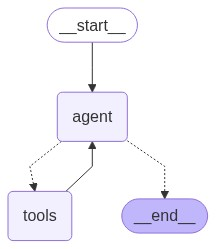

In [ ]:
const graph = agent.getGraph();
const image = await graph.drawMermaidPng();
const arrayBuffer = await image.arrayBuffer();

Deno.jupyter.image(new Uint8Array(arrayBuffer));

In [ ]:
// Alternatively, you can save the graph as a PNG file locally
import { writeFileSync } from "node:fs";

writeFileSync("./graphState.png", new Uint8Array(arrayBuffer));
